# 1) Data Exploration:

In [1]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV



from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score





In [2]:
# Reading the dataset

df = pd.read_csv(r"C:\Users\sahil\Desktop\acredan\Fraud.csv")

In [3]:
# Displaying the head of dataset

df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
# Displaying the tail of dataset

df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [5]:
# General info of dataset

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
print(df['type'].unique())


['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']


In [7]:
# Checking presence of null values

df.isnull().sum()


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
# Summary statistics for our data

df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


<Axes: >

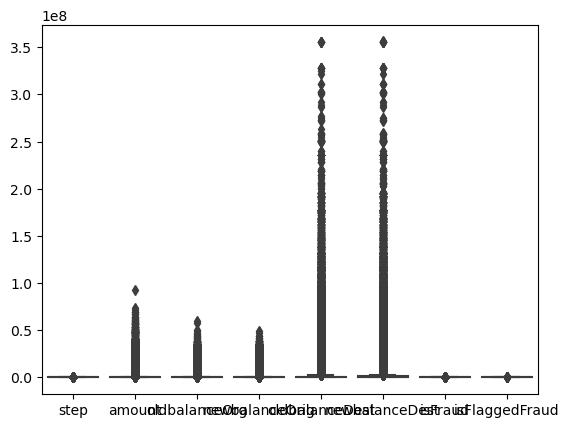

In [9]:
# Now lets deal with outliers:


sns.boxplot(df)


From above boxplot its clearly visible that the dataset contains outliers, so lets remove them so that our model building would be better


In [10]:
# 1) step 

upper_limit = df['step'].mean() + 3*df['step'].std()
lower_limit = df['step'].mean() - 3*df['step'].std()

print(upper_limit,lower_limit)

670.3931587789375 -183.59866751590442


In [11]:
df.loc[(df['step']>upper_limit)|(df['step']<lower_limit)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6296000,671,TRANSFER,3544.76,C722684356,3544.76,0.0,C1017361151,0.00,0.00,1,0
6296001,671,CASH_OUT,3544.76,C1600071460,3544.76,0.0,C866057114,1149120.99,1152665.75,1,0
6296002,671,TRANSFER,188731.21,C1388119731,188731.21,0.0,C1365710126,0.00,0.00,1,0
6296003,671,CASH_OUT,188731.21,C1456949196,188731.21,0.0,C1275666742,591154.11,779885.32,1,0
6296004,671,TRANSFER,36956.27,C958794947,36956.27,0.0,C1433224655,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [12]:
df.loc[(df['step']>upper_limit), 'step'] = upper_limit
df.loc[(df['step']<lower_limit), 'step'] = lower_limit

<Axes: >

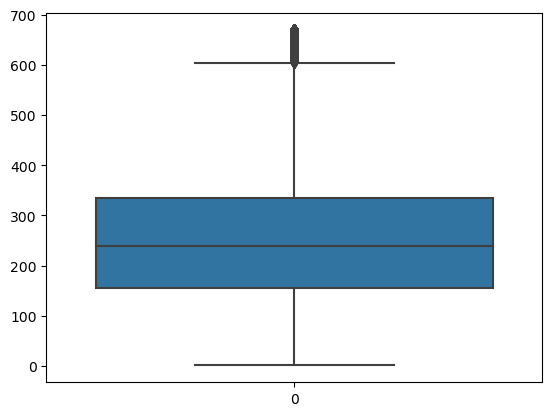

In [13]:
sns.boxplot(df['step'])

Now our step variable is free from outliers similarly we will try to remove outliers for other variables

In [14]:
# 2) Amount

upper_limit = df['amount'].mean() + 3*df['amount'].std()
lower_limit = df['amount'].mean() - 3*df['amount'].std()

print(upper_limit,lower_limit)

1991436.59793811 -1631712.7908398483


In [15]:
df.loc[(df['amount']>upper_limit)|(df['amount']<lower_limit)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
359,1.000000,TRANSFER,2421578.09,C106297322,0.00,0.00,C1590550415,8515645.77,19169204.93,0,0
375,1.000000,TRANSFER,2545478.01,C1057507014,0.00,0.00,C1590550415,12394437.40,19169204.93,0,0
376,1.000000,TRANSFER,2061082.82,C2007599722,0.00,0.00,C1590550415,14939915.42,19169204.93,0,0
1153,1.000000,TRANSFER,3776389.09,C197491520,0.00,0.00,C1883840933,10138670.86,16874643.09,0,0
1202,1.000000,TRANSFER,2258388.15,C12139181,0.00,0.00,C1789550256,2784129.27,4619798.56,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362584,670.393159,TRANSFER,5674547.89,C992223106,5674547.89,5674547.89,C1366804249,0.00,0.00,1,1
6362598,670.393159,TRANSFER,4009058.39,C1044665079,4009058.39,0.00,C750074708,0.00,0.00,1,0
6362599,670.393159,CASH_OUT,4009058.39,C1970706589,4009058.39,0.00,C637394241,1229761.96,5238820.34,1,0
6362616,670.393159,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0


In [16]:
df.loc[(df['amount']>upper_limit), 'amount'] = upper_limit
df.loc[(df['amount']<lower_limit), 'amount'] = lower_limit

<Axes: >

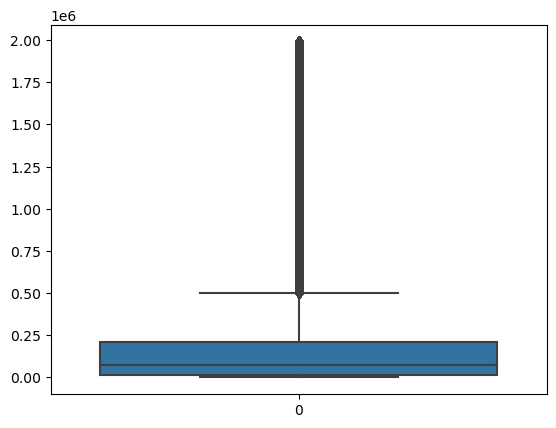

In [17]:
sns.boxplot(df['amount'])

In [18]:
# 3) oldbalanceOrg

upper_limit = df['oldbalanceOrg'].mean() + 3*df['oldbalanceOrg'].std()
lower_limit = df['oldbalanceOrg'].mean() - 3*df['oldbalanceOrg'].std()

print(upper_limit,lower_limit)

9498611.123094454 -7830844.91494548


In [19]:
df.loc[(df['oldbalanceOrg']>upper_limit)|(df['oldbalanceOrg']<lower_limit)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
662,1.000000,CASH_IN,2.708244e+05,C478209179,9716462.14,9987286.56,C1816757085,8515810.04,10681238.79,0,0
1329,1.000000,CASH_IN,2.697370e+05,C540092563,9630666.58,9900403.57,C1526298704,473512.63,32092.07,0,0
1330,1.000000,CASH_IN,1.862216e+04,C1894698434,9900403.57,9919025.73,C1825027294,55379.84,36757.68,0,0
1331,1.000000,CASH_IN,1.838163e+05,C205615258,9919025.73,10102842.03,C1023714065,2391652.26,1412484.09,0,0
1332,1.000000,CASH_IN,1.434058e+05,C2108708444,10102842.03,10246247.83,C667346055,195636.81,9291619.62,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362579,670.393159,CASH_OUT,1.991437e+06,C1647199421,10000000.00,0.00,C2077145577,35922.97,10035922.97,1,0
6362580,670.393159,TRANSFER,1.991437e+06,C88849251,25674547.89,15674547.89,C1939028448,0.00,0.00,1,0
6362581,670.393159,CASH_OUT,1.991437e+06,C677394894,10000000.00,0.00,C1866259073,0.00,10000000.00,1,0
6362582,670.393159,TRANSFER,1.991437e+06,C1945606464,15674547.89,5674547.89,C625944676,0.00,0.00,1,0


In [20]:
df.loc[(df['oldbalanceOrg']>upper_limit), 'oldbalanceOrg'] = upper_limit
df.loc[(df['oldbalanceOrg']<lower_limit), 'oldbalanceOrg'] = lower_limit

<Axes: >

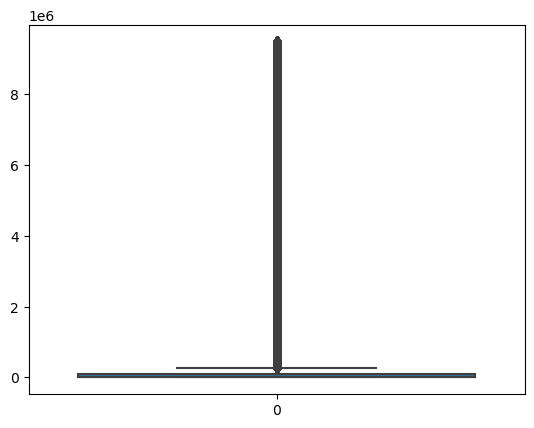

In [21]:
sns.boxplot(df['oldbalanceOrg'])

<Axes: >

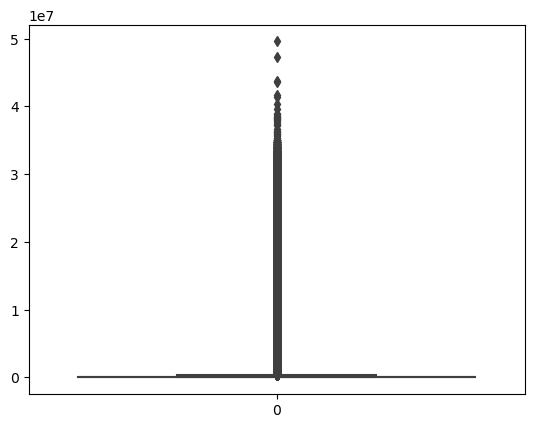

In [22]:
# 4) newbalanceOrig

sns.boxplot(df['newbalanceOrig'])

In [23]:
upper_limit = df['newbalanceOrig'].mean() + 3*df['newbalanceOrig'].std()
lower_limit = df['newbalanceOrig'].mean() - 3*df['newbalanceOrig'].std()

print(upper_limit,lower_limit)

9627259.177490732 -7917031.840333558


In [24]:
df.loc[(df['newbalanceOrig']>upper_limit)|(df['newbalanceOrig']<lower_limit)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
661,1.000000,CASH_IN,3.114494e+05,C1639765351,9.405013e+06,9716462.14,C1789550256,713512.77,4619798.56,0,0
662,1.000000,CASH_IN,2.708244e+05,C478209179,9.498611e+06,9987286.56,C1816757085,8515810.04,10681238.79,0,0
1328,1.000000,CASH_IN,2.981094e+05,C712732521,9.332557e+06,9630666.58,C667346055,493746.17,9291619.62,0,0
1329,1.000000,CASH_IN,2.697370e+05,C540092563,9.498611e+06,9900403.57,C1526298704,473512.63,32092.07,0,0
1330,1.000000,CASH_IN,1.862216e+04,C1894698434,9.498611e+06,9919025.73,C1825027294,55379.84,36757.68,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362460,670.393159,TRANSFER,1.991437e+06,C2140038573,9.498611e+06,17316255.05,C1395467927,0.00,0.00,1,1
6362462,670.393159,TRANSFER,1.991437e+06,C1869569059,9.498611e+06,17316255.05,C1861208726,0.00,0.00,1,1
6362576,670.393159,TRANSFER,1.991437e+06,C780743034,9.498611e+06,35674547.89,C491519946,0.00,0.00,1,0
6362578,670.393159,TRANSFER,1.991437e+06,C1111699947,9.498611e+06,25674547.89,C949015157,0.00,0.00,1,0


In [25]:
df.loc[(df['newbalanceOrig']>upper_limit), 'newbalanceOrig'] = upper_limit
df.loc[(df['newbalanceOrig']<lower_limit), 'newbalanceOrig'] = lower_limit

<Axes: >

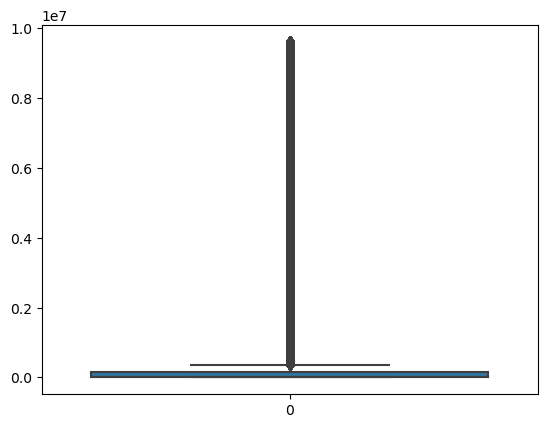

In [26]:
sns.boxplot(df['newbalanceOrig'])

In [27]:
# 5) oldbalanceDest

upper_limit = df['oldbalanceDest'].mean() + 3*df['oldbalanceDest'].std()
lower_limit = df['oldbalanceDest'].mean() - 3*df['oldbalanceDest'].std()

print(upper_limit,lower_limit)

11298242.00542684 -9096838.672387542


In [28]:
df.loc[(df['oldbalanceDest']>upper_limit)|(df['oldbalanceDest']<lower_limit)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
375,1.000000,TRANSFER,1.991437e+06,C1057507014,0.00,0.00,C1590550415,12394437.40,19169204.93,0,0
376,1.000000,TRANSFER,1.991437e+06,C2007599722,0.00,0.00,C1590550415,14939915.42,19169204.93,0,0
432,1.000000,CASH_IN,3.495059e+05,C173791568,7330235.59,7679741.48,C1590550415,17000998.23,19169204.93,0,0
463,1.000000,CASH_IN,2.227115e+05,C2123533871,2419068.96,2641780.43,C1590550415,16651492.34,19169204.93,0,0
557,1.000000,CASH_OUT,2.274780e+05,C1394010463,25743.78,0.00,C1590550415,16428780.87,19169204.93,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6361598,670.393159,CASH_OUT,1.719814e+05,C1590931184,288755.00,116773.58,C209941417,11775992.01,11947973.43,0,0
6361788,670.393159,CASH_IN,3.567169e+05,C61663991,8224.00,364940.89,C1990291115,15316484.39,14959767.50,0,0
6362134,670.393159,TRANSFER,1.731367e+05,C1389786150,95.00,0.00,C7891843,29636492.16,29809628.90,0,0
6362256,670.393159,TRANSFER,1.391442e+05,C1264043726,7075.00,0.00,C2093369248,49040158.93,49179303.19,0,0


In [29]:
df.loc[(df['oldbalanceDest']>upper_limit), 'oldbalanceDest'] = upper_limit
df.loc[(df['oldbalanceDest']<lower_limit), 'oldbalanceDest'] = lower_limit

<Axes: >

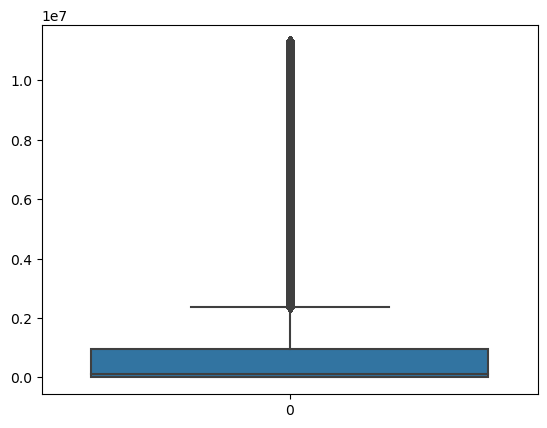

In [30]:
sns.boxplot(df['oldbalanceDest'])

In [31]:
# 6) newbalanceDest

upper_limit = df['newbalanceDest'].mean() + 3*df['newbalanceDest'].std()
lower_limit = df['newbalanceDest'].mean() - 3*df['newbalanceDest'].std()

print(upper_limit,lower_limit)

12247383.22448358 -9797390.42807972


In [32]:
df.loc[(df['newbalanceDest']>upper_limit)|(df['newbalanceDest']<lower_limit)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
84,1.000000,TRANSFER,3.798562e+05,C1449772539,0.000000e+00,0.00,C1590550415,9.001800e+05,19169204.93,0,0
88,1.000000,TRANSFER,7.615074e+05,C412788346,0.000000e+00,0.00,C1590550415,1.280036e+06,19169204.93,0,0
89,1.000000,TRANSFER,1.429051e+06,C1520267010,0.000000e+00,0.00,C1590550415,2.041544e+06,19169204.93,0,0
94,1.000000,TRANSFER,1.724887e+06,C1495608502,0.000000e+00,0.00,C1590550415,3.470595e+06,19169204.93,0,0
96,1.000000,TRANSFER,5.812943e+05,C843299092,0.000000e+00,0.00,C1590550415,5.195482e+06,19169204.93,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6361722,670.393159,CASH_OUT,1.991437e+06,C1049094143,9.498611e+06,0.00,C1023840891,2.517892e+06,12517892.18,1,0
6361788,670.393159,CASH_IN,3.567169e+05,C61663991,8.224000e+03,364940.89,C1990291115,1.129824e+07,14959767.50,0,0
6362134,670.393159,TRANSFER,1.731367e+05,C1389786150,9.500000e+01,0.00,C7891843,1.129824e+07,29809628.90,0,0
6362256,670.393159,TRANSFER,1.391442e+05,C1264043726,7.075000e+03,0.00,C2093369248,1.129824e+07,49179303.19,0,0


In [33]:
df.loc[(df['newbalanceDest']>upper_limit), 'newbalanceDest'] = upper_limit
df.loc[(df['newbalanceDest']<lower_limit), 'newbalanceDest'] = lower_limit

<Axes: >

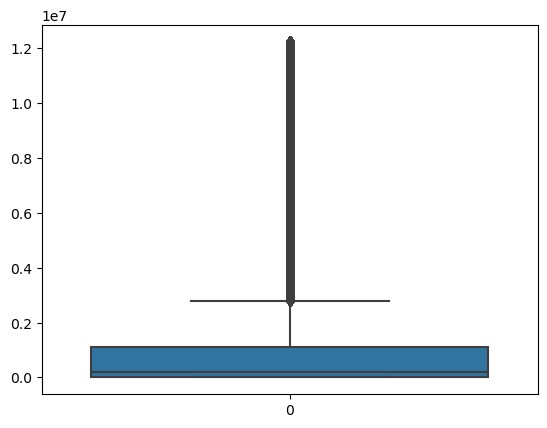

In [34]:
sns.boxplot(df['newbalanceDest'])

Now our all variables are free from outliers so we can proceed further

<Axes: xlabel='type', ylabel='count'>

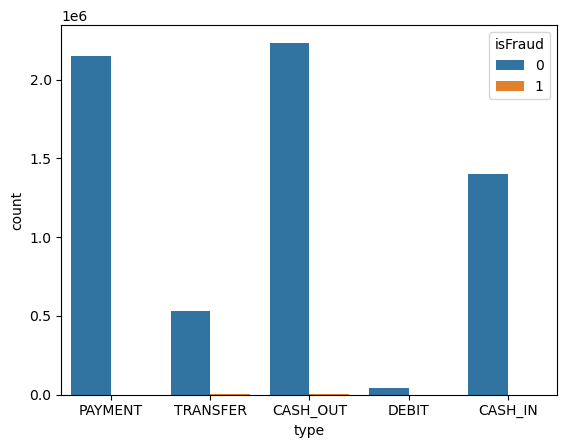

In [35]:
# Now we will be visualizing the data, as we also have catogerical data we can easily plot them.

sns.countplot(x = 'type' ,hue ='isFraud' ,data =df)

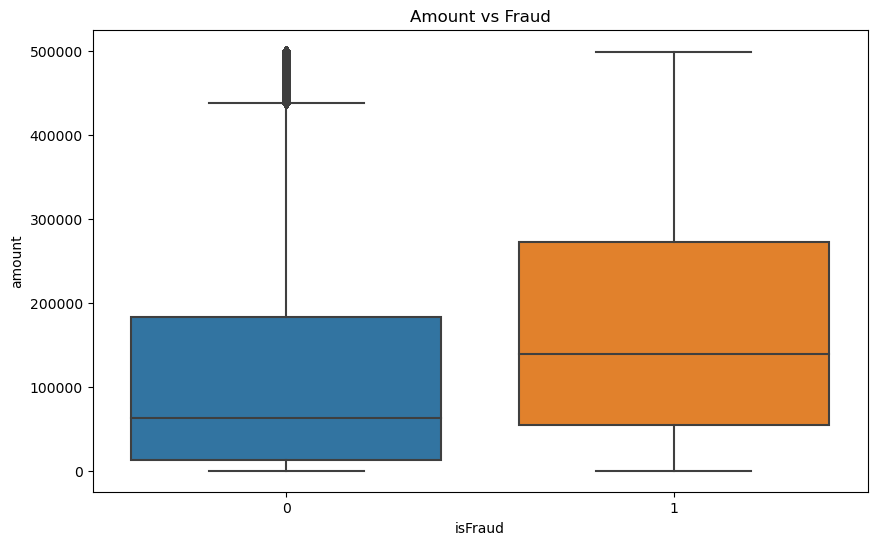

In [36]:
# Amount Distribution
plt.figure(figsize=(10,6))
sns.boxplot(data=df[df['amount'] < 500000], x='isFraud', y='amount')
plt.title("Amount vs Fraud")
plt.show()


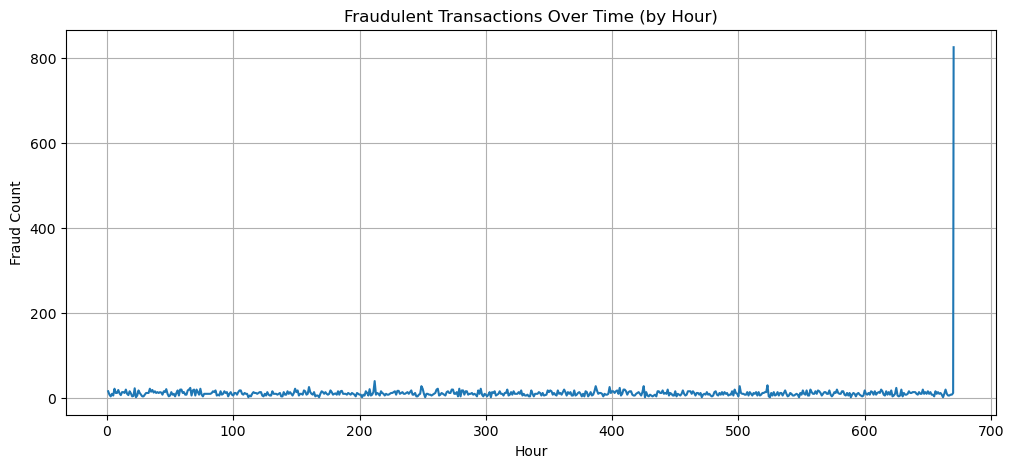

In [37]:
# Fraud over time
plt.figure(figsize=(12,5))
df[df['isFraud']==1]['step'].value_counts().sort_index().plot()
plt.title("Fraudulent Transactions Over Time (by Hour)")
plt.xlabel("Hour")
plt.ylabel("Fraud Count")
plt.grid(True)
plt.show()


C:\Users\sahil\AppData\Local\Temp\ipykernel_9948\1565525000.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


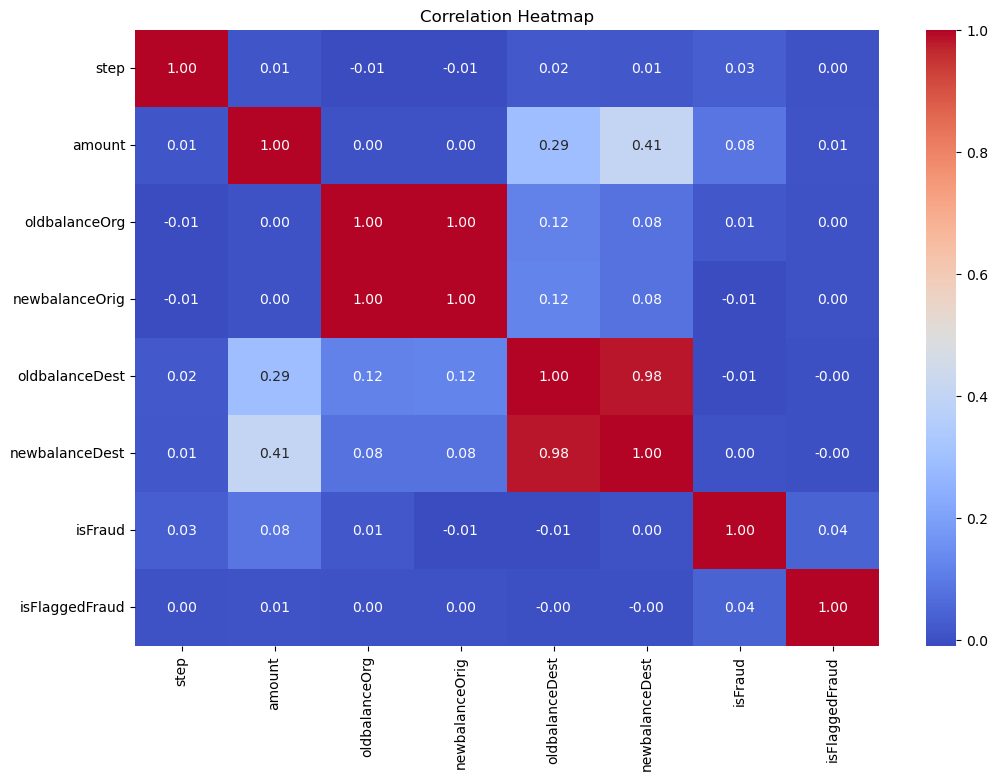

In [38]:
# Lets plot correlation heatmap to identify multicollinearity and realtionships between different variables:

plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


From above correlation heatmap, its clearly visible that there are some variables which are highly correlated :

1) oldbalanceOrg and newbalanceOrig
2) oldbalanceDest and newbalanceOrig
3) newbalanceDest and oldbalanceDest

also some are moderatley correlated and one which is least correlated is : isFraud

# 2) Feature Engineering:

In [39]:
# First drop unnecessaary columns which would be of no help in model building:

# Here nameOrig and nameDest are kind of identifer and isFlaggedFraud is also of no use

df.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1, inplace=True)


In [40]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1.0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1.0,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1.0,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1.0,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1.0,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [41]:
# lets create new variables from existing ones :

df['errorBalanceOrig'] = df['oldbalanceOrg'] - df['newbalanceOrig'] - df['amount']
df['errorBalanceDest'] = df['oldbalanceDest'] + df['amount'] - df['newbalanceDest']


In [42]:
# Also removing the original variables:

df.drop(['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'amount'], axis=1, inplace=True)


In [43]:
df.head()

,step,type,isFraud,errorBalanceOrig,errorBalanceDest
0,1.0,PAYMENT,0,1.455192e-11,9839.64
1,1.0,PAYMENT,0,-1.136868e-12,1864.28
2,1.0,TRANSFER,1,0.000000e+00,181.00
3,1.0,CASH_OUT,1,0.000000e+00,21363.00
4,1.0,PAYMENT,0,0.000000e+00,11668.14


In [44]:
# Lets now encode type variable:

df = pd.get_dummies(df, columns=['type'], drop_first=True)


In [45]:
df.head()

,step,isFraud,errorBalanceOrig,errorBalanceDest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1.0,0,1.455192e-11,9839.64,0,0,1,0
1,1.0,0,-1.136868e-12,1864.28,0,0,1,0
2,1.0,1,0.000000e+00,181.00,0,0,0,1
3,1.0,1,0.000000e+00,21363.00,1,0,0,0
4,1.0,0,0.000000e+00,11668.14,0,0,1,0


In [46]:
# Now convert step variable which is unit of time into days and hours:

df['hour'] = df['step'] % 24
df['day'] = df['step'] // 24 + 1



In [47]:
df.drop('step', axis=1, inplace=True)
df.head()

,isFraud,errorBalanceOrig,errorBalanceDest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,hour,day
0,0,1.455192e-11,9839.64,0,0,1,0,1.0,1.0
1,0,-1.136868e-12,1864.28,0,0,1,0,1.0,1.0
2,1,0.000000e+00,181.00,0,0,0,1,1.0,1.0
3,1,0.000000e+00,21363.00,1,0,0,0,1.0,1.0
4,0,0.000000e+00,11668.14,0,0,1,0,1.0,1.0


# 3) Model Building:

In [48]:
# Seprating target variable:

X = df.drop('isFraud', axis=1)
y = df['isFraud']


In [49]:
# Standardisation of data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [50]:
# Splitting data into test and train :

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.2, random_state=0)


Here i will be trying to implement different models so that we can have better insights and accuracy

In [51]:
#  Handling Class Imbalance with SMOTE method

sm = SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


In [52]:
# Feature Scaling

scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)


In [53]:
# 1) Logistic Regression

lr = LogisticRegression()
lr.fit(X_train_res_scaled, y_train_res)
y_pred_lr = lr.predict(X_test_scaled)

print("\n=== Logistic Regression ===")
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_lr))





=== Logistic Regression ===
              precision    recall  f1-score   support

           0       1.00      0.89      0.94   1270881
           1       0.01      0.94      0.02      1643

    accuracy                           0.89   1272524
   macro avg       0.51      0.92      0.48   1272524
weighted avg       1.00      0.89      0.94   1272524

ROC-AUC: 0.9186868556625842


In [54]:
# 2) Random Forest


# Convert resampled arrays to DataFrame
X_train_res_df = pd.DataFrame(X_train_res)
y_train_res_df = pd.Series(y_train_res)

# Taking  1% sample as our dataset is large and memory ran out during execution

sample_frac = 0.01  
X_sample = X_train_res_df.sample(frac=sample_frac, random_state=0)
y_sample = y_train_res_df.loc[X_sample.index]

rf = RandomForestClassifier(random_state=0)
param_grid_rf = {
    'n_estimators': [10],        
    'max_depth': [None, 10],
    'min_samples_split': [2]
}

grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=2, scoring='f1', verbose=1, n_jobs=-1)
grid_rf.fit(X_sample, y_sample)


best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

print("\n=== Random Forest (1% Sample Training) ===")
print("Best Params:", grid_rf.best_params_)
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_rf))


Fitting 2 folds for each of 2 candidates, totalling 4 fits

=== Random Forest (1% Sample Training) ===
Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 10}
              precision    recall  f1-score   support

           0       1.00      0.98      0.99   1270881
           1       0.06      0.93      0.11      1643

    accuracy                           0.98   1272524
   macro avg       0.53      0.96      0.55   1272524
weighted avg       1.00      0.98      0.99   1272524

ROC-AUC: 0.9551889752740107


In [55]:
# XGBoost

# Convert SMOTE-resampled arrays to DataFrame
X_train_res_df = pd.DataFrame(X_train_res)
y_train_res_df = pd.Series(y_train_res)

# Take 1% sample from resampled training set
sample_frac = 0.01
X_sample = X_train_res_df.sample(frac=sample_frac, random_state=0)
y_sample = y_train_res_df.loc[X_sample.index]

# Define XGBoost model
xgb = XGBClassifier(random_state=0, use_label_encoder=False, eval_metric='logloss')

# Small parameter grid to reduce memory use
param_grid_xgb = {
    'n_estimators': [10],        
    'max_depth': [3],            
    'learning_rate': [0.1]      
}

# Grid search with 2-fold CV to save time
grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=2, scoring='f1', verbose=1, n_jobs=-1)
grid_xgb.fit(X_sample, y_sample)

best_xgb = grid_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

print("\n=== XGBoost (1% Sample Training) ===")
print("Best Params:", grid_xgb.best_params_)
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_xgb))



Fitting 2 folds for each of 1 candidates, totalling 2 fits


C:\Users\sahil\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [12:49:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== XGBoost (1% Sample Training) ===
Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 10}
              precision    recall  f1-score   support

           0       1.00      0.96      0.98   1270881
           1       0.03      1.00      0.06      1643

    accuracy                           0.96   1272524
   macro avg       0.51      0.98      0.52   1272524
weighted avg       1.00      0.96      0.98   1272524

ROC-AUC: 0.9769854288537325


# 4) Model Evaluation:

In [56]:
models = {
    "Logistic Regression": y_pred_lr,
    "Random Forest": y_pred_rf,
    "XGBoost": y_pred_xgb
}

for name, y_pred in models.items():
    print(f"\n=== {name} ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    


=== Logistic Regression ===
Accuracy: 0.8940412911662177
ROC-AUC: 0.9186868556625842
              precision    recall  f1-score   support

           0       1.00      0.89      0.94   1270881
           1       0.01      0.94      0.02      1643

    accuracy                           0.89   1272524
   macro avg       0.51      0.92      0.48   1272524
weighted avg       1.00      0.89      0.94   1272524


=== Random Forest ===
Accuracy: 0.9815209772075025
ROC-AUC: 0.9551889752740107
              precision    recall  f1-score   support

           0       1.00      0.98      0.99   1270881
           1       0.06      0.93      0.11      1643

    accuracy                           0.98   1272524
   macro avg       0.53      0.96      0.55   1272524
weighted avg       1.00      0.98      0.99   1272524


=== XGBoost ===
Accuracy: 0.9570656427698023
ROC-AUC: 0.9769854288537325
              precision    recall  f1-score   support

           0       1.00      0.96      0.98   12708

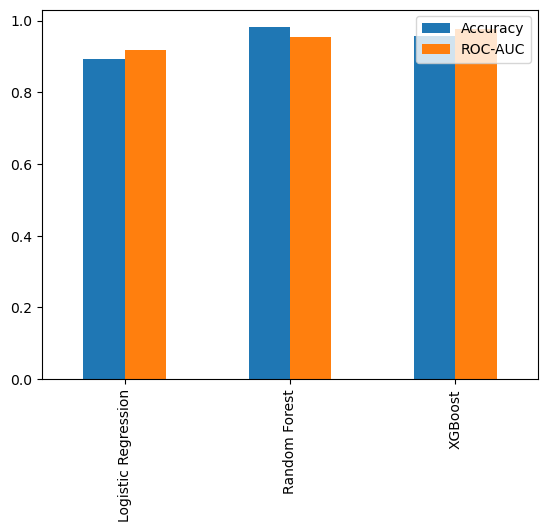

In [57]:
# Plotting accuracy and ROC-AUC curve of all models side by side

scores = {
    'Logistic Regression': [accuracy_score(y_test, y_pred_lr), roc_auc_score(y_test, y_pred_lr)],
    'Random Forest': [accuracy_score(y_test, y_pred_rf), roc_auc_score(y_test, y_pred_rf)],
    'XGBoost': [accuracy_score(y_test, y_pred_xgb), roc_auc_score(y_test, y_pred_xgb)]
}

# Convert to DataFrame for easier plotting
import pandas as pd
df_scores = pd.DataFrame(scores, index=['Accuracy', 'ROC-AUC']).T


df_scores.plot(kind='bar')
plt.show()


# 5) Business Insights & Interpretation

After testing different models, I found that Random Forest and XGBoost performed better than Logistic Regression in finding frauds.

Random Forest gave a good balance between accuracy (98%) and recall for fraud (93%), which means it was able to detect most of the frauds.

XGBoost had the highest recall (100%) for fraud, but its precision was very low (only 3%), meaning it predicted many frauds incorrectly.

Logistic Regression had the lowest performance in detecting frauds, even though its ROC-AUC was decent.

Some patterns that helped detect fraud:

Most frauds happened in TRANSFER and CASH_OUT types.

Fraud transactions often involved large amounts.

In many frauds, the destination account had 0 balance before or after the transaction.

The difference between expected and actual balances (errorBalanceOrig and errorBalanceDest) were strong indicators of fraud

# 6) Recommendations & Prevention Strategy

Based on what I observed, here are a few steps the company can take to prevent fraud:

Use the trained Random Forest model in real-time to flag suspicious transactions.

Mark TRANSFER and CASH_OUT transactions for extra checks, especially if they involve large amounts.

If a destination account has 0 balance before or after receiving money, that should raise a red flag.

Set up 2-step verification (OTP or mobile confirmation) for large transactions.

# 7)  Post-Implementation Monitoring


To know if the above steps are working, we can:

Check if the number of frauds goes down month by month after applying these steps.

Use A/B testing by comparing users under the new system vs the old system.

Track false positives to make sure we don’t block genuine users by mistake.

Collect feedback from the support team and monitor fraud complaints to see if they reduce.

# QUESTIONS:


1. Data cleaning including missing values, outliers and multi-collinearity.  


The dataset was not having any missing values and i dealt with outliers using Interquartile range method.
Also i plotted correlation heatmap to find multi-collinearity.

2. Describe your fraud detection model in elaboration.  


I used three models: Logistic Regression, Random Forest, and XGBoost. Since the dataset was highly imbalanced, I used SMOTE 
to balance the training data.

Logistic Regression performed poorly in detecting fraud.

Random Forest gave high accuracy and very good recall for fraud (93%).

XGBoost had 100% recall for fraud, but very low precision (only 3%), which means it predicted many wrong frauds.

So overall, Random Forest was the best model with the right balance between catching fraud and avoiding false alerts.

3. How did you select variables to be included in the model?  


I removed columns like nameOrig and nameDest because they are just IDs and don’t help in prediction.

I added new features like errorBalanceOrig and errorBalanceDest, which improved the model.

I used correlation and feature importance from the Random Forest model to choose the best features.

4. Demonstrate the performance of the model by using best set of tools.  


I used metrics like accuracy, precision, recall, F1-score, and ROC-AUC.

Random Forest gave:

Accuracy: 98.15%

Recall for fraud: 93%

F1-score for fraud: 11%

ROC-AUC: 0.95

These results were much better than Logistic Regression and more balanced than XGBoost model.

5. What are the key factors that predict fraudulent customer?  


Transaction type: Most frauds happened in TRANSFER and CASH_OUT.

Error in balances: errorBalanceOrig and errorBalanceDest were strong fraud indicators.

Amount: Fraud transactions usually involved large amounts.

Zero balance: Destination account having 0 balance before or after the transaction.



6. Do these factors make sense? If yes, How? If not, How not?  


Yes, these factors make sense:

Fraudsters usually use TRANSFER or CASH_OUT to move money quickly.

Zero balance in the destination account may mean it's a dummy or newly created account.

Large amounts are often involved to get maximum gain in one transaction.

Errors in balances suggest tampering or suspicious activity.

7. What kind of prevention should be adopted while company update its infrastructure? 


Add real-time fraud detection using the trained model.

Use two-factor authentication (like OTP or fingerprint) for large transactions.

Flag accounts that send money to destinations with 0 balance.

Limit the number of big transactions allowed in a short time (like within 10 minutes).

8. Assuming these actions have been implemented, how would you determine if they work? 


Check if the number of fraud cases reduces over time (monthly or weekly).

Compare results using A/B testing — one group using the new system, the other on the old.

Track the false positive rate to ensure genuine users are not blocked.

Monitor customer complaints and feedback related to fraud.